In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from src import camvid
from src import predict
from src.tiramisu import tiramisu
from src.callbacks import PlotMetrics
from src.utils import history_to_results
%matplotlib inline
plt.style.use('dark_background')

Using TensorFlow backend.


In [2]:
# the location to save coarse training weights to
coarse_weights = 'models/Tiramisu103-CamVid11-coarse.h5'
# the location to save fine training weights to
fine_weights = 'models/Tiramisu103-CamVid11-fine.h5'

In [3]:
# the size to reshape images to before transformation
target_size = (360, 480)
# the size to crop images to for coarse training
coarse_crop = (224, 224)
# the batch size during coarse training
coarse_batch = 3
# the size to crop images to for fine tune training
fine_crop = (352, 480)
# the batch size during fine training
fine_batch = 1

# Coarse Tuning

In [4]:
camvid11 = camvid.CamVid(
    mapping=camvid.load_mapping(),
    target_size=target_size,
    crop_size=coarse_crop,
    batch_size=coarse_batch,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.


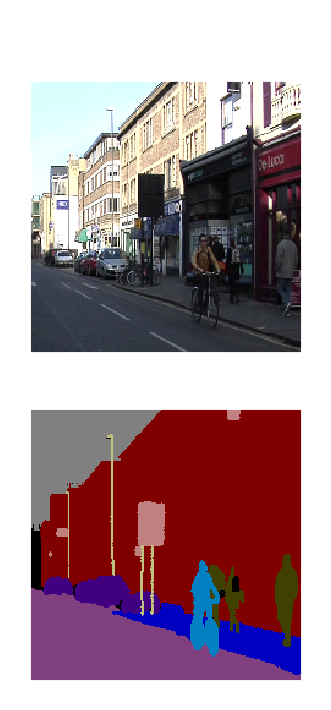

In [5]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
camvid.plot(X=X[0], y=y[0], order=['X', 'y'])

In [6]:
# build the model for the image shape and number of labels
model = tiramisu.tiramisu((*coarse_crop, 3), camvid11.n,
    class_weights=(camvid11.class_weights > 0).astype(int),
    learning_rate=1e-3,
)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tiramisu_input (InputLayer)     (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
pixel_norm (Lambda)             (None, 224, 224, 3)  0           Tiramisu_input[0][0]             
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 48) 1344        pixel_norm[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation

In [7]:
# callbacks = [
#     EarlyStopping(monitor='val_categorical_accuracy', patience=100),
#     LearningRateScheduler(lambda _, lr: 0.995 * lr),
#     ModelCheckpoint(coarse_weights, 
#         monitor='val_categorical_accuracy', 
#         save_best_only=True, 
#         save_weights_only=True, 
#         mode='max'
#     ),
#     PlotMetrics(),
# ]

In [8]:
# # fit the model with the data. divide the steps per epoch by the batch size
# history = model.fit_generator(generators['train'],
#     epochs=200,
#     steps_per_epoch=int(367 / coarse_batch),
#     validation_data=generators['val'],
#     validation_steps=101,
#     callbacks=callbacks,
#     verbose=0
# )

In [9]:
# history_to_results(history)

## Test Metrics

In [10]:
model.load_weights(coarse_weights)

In [11]:
# metrics = model.evaluate_generator(generators['test'], steps=233)
# names = model.metrics_names
# pd.DataFrame(metrics, names, columns=['test'])

## Qualitative Results

### Train

In [12]:
X, y, p = predict.predict(model, generators['train'], camvid11)

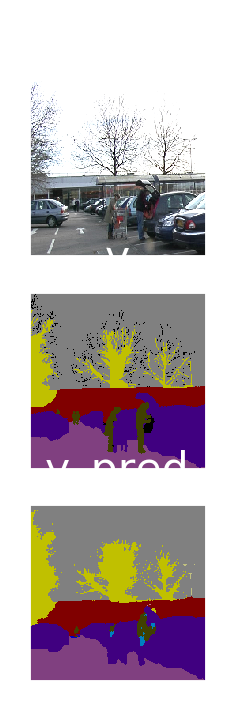

In [13]:
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

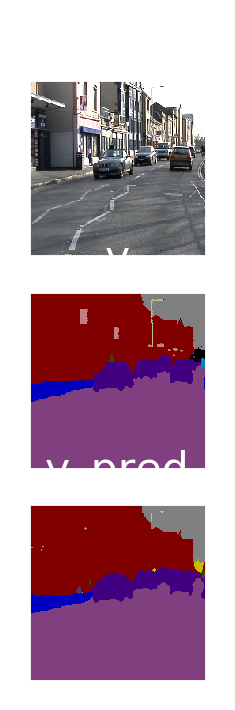

In [14]:
camvid.plot(X=X[1], y=y[1], y_pred=p[1], order=['X', 'y', 'y_pred'])

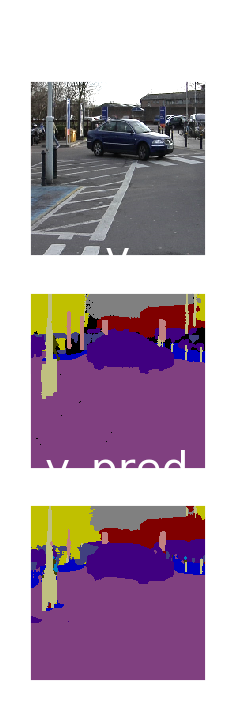

In [15]:
camvid.plot(X=X[2], y=y[2], y_pred=p[2], order=['X', 'y', 'y_pred'])

### Validation

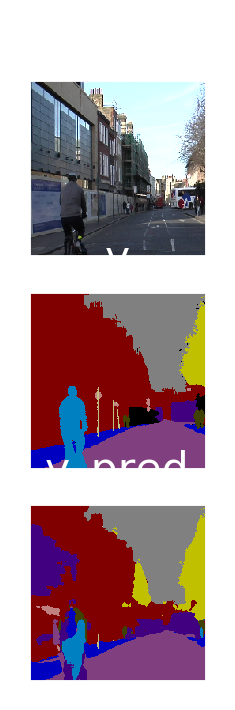

In [16]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

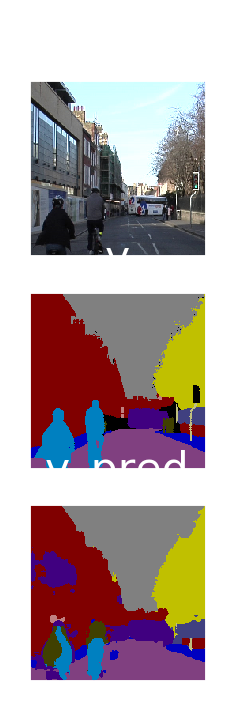

In [17]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

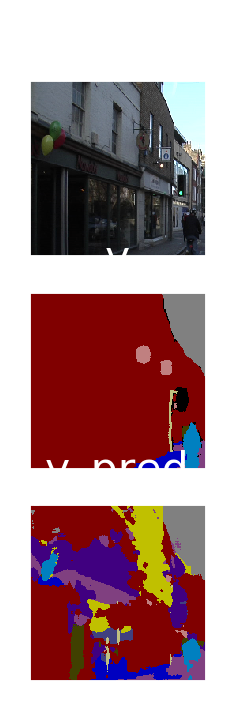

In [18]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

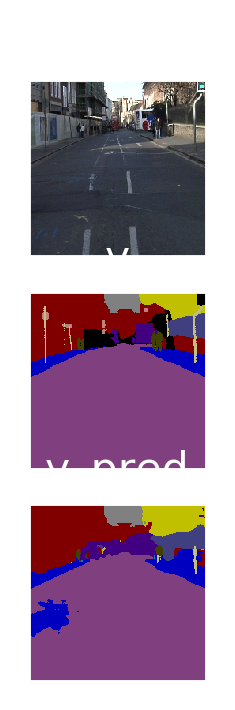

In [19]:
X, y, p = predict.predict(model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

### Test

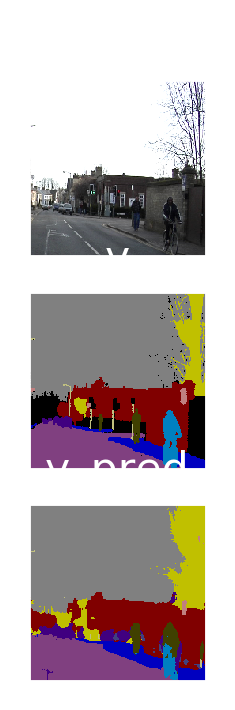

In [20]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

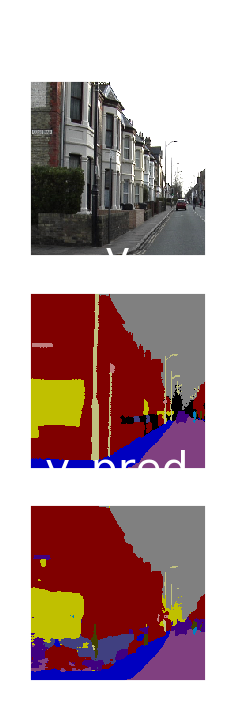

In [21]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

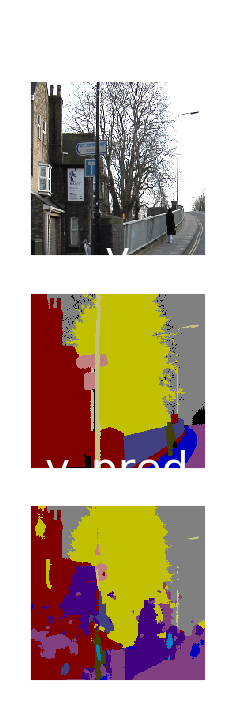

In [22]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

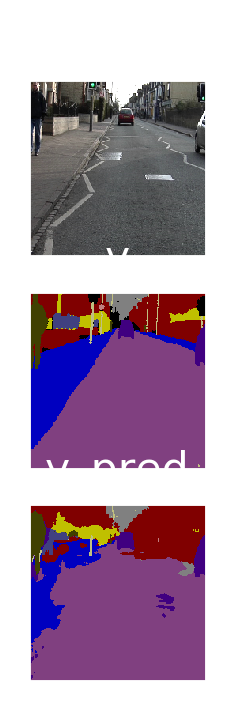

In [23]:
X, y, p = predict.predict(model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

# Clear Session

remove the current model from memory.

In [24]:
from keras import backend as K
K.clear_session()

# Fine Tuning

In [25]:
camvid11 = camvid.CamVid(
    mapping=camvid.load_mapping(),
    target_size=target_size,
    crop_size=fine_crop,
    batch_size=fine_batch,
    horizontal_flip=True,
    ignored_labels=['Void'],
)
generators = camvid11.generators()

Found 367 images belonging to 1 classes.
Found 367 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 101 images belonging to 1 classes.
Found 233 images belonging to 1 classes.
Found 233 images belonging to 1 classes.


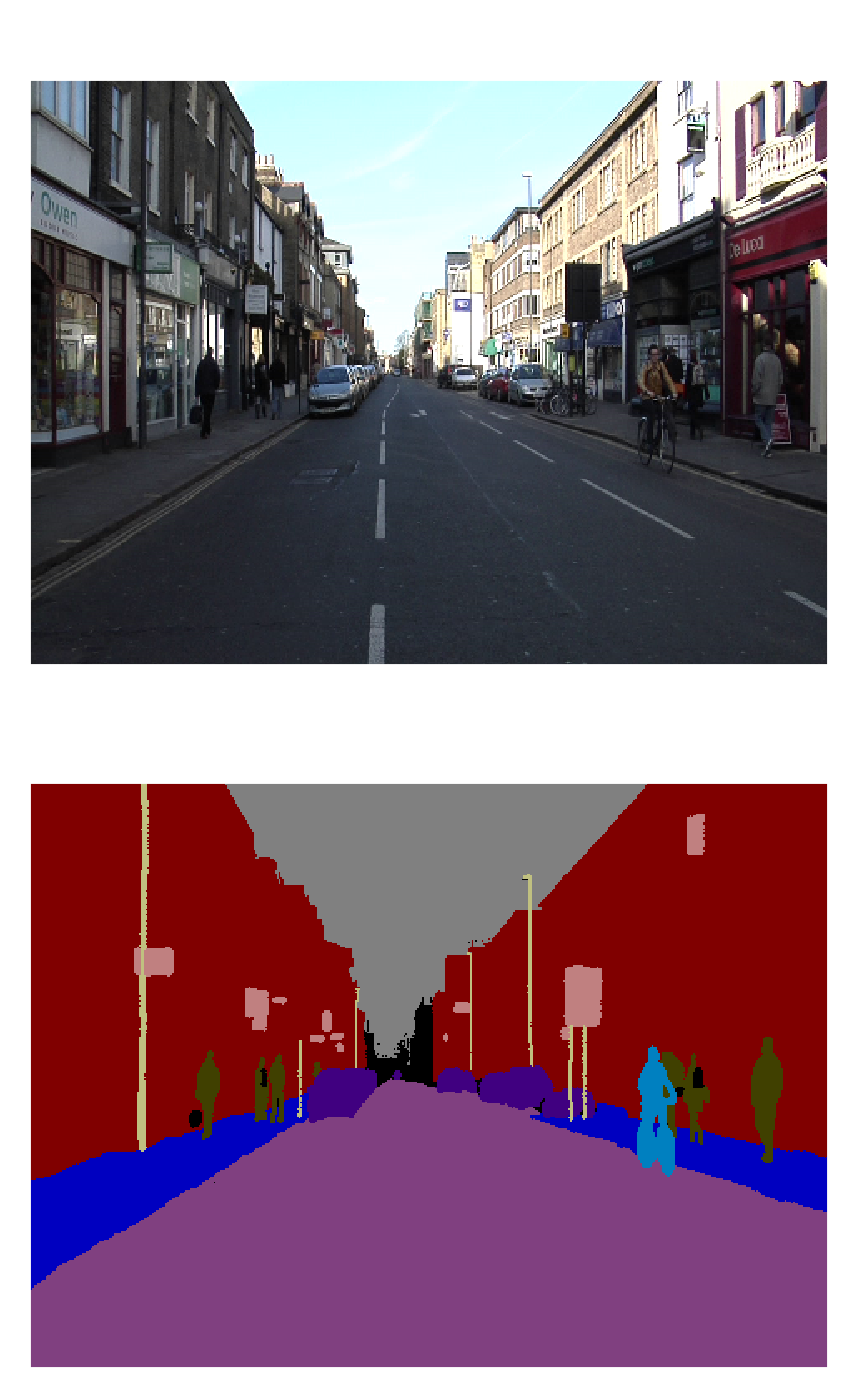

In [26]:
# get the next X, y training tuple
X, y = next(generators['train'])
# transform the onehot vector to an image
y = camvid11.unmap(y)
# plot the images
camvid.plot(X=X[0], y=y[0], order=['X', 'y'])

In [27]:
# build the model for the image shape and number of labels
tune_model = tiramisu.tiramisu((*fine_crop, 3), camvid11.n,
    class_weights=(camvid11.class_weights > 0).astype(int),
    learning_rate=1e-4,
)
# load the weights from the coarsely trained model
tune_model.load_weights(coarse_weights)
tune_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Tiramisu_input (InputLayer)     (None, 352, 480, 3)  0                                            
__________________________________________________________________________________________________
pixel_norm (Lambda)             (None, 352, 480, 3)  0           Tiramisu_input[0][0]             
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 352, 480, 48) 1344        pixel_norm[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 352, 480, 48) 192         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation

In [28]:
# callbacks = [
#     EarlyStopping(monitor='val_categorical_accuracy', patience=50),
#     ModelCheckpoint(fine_weights, 
#         monitor='val_categorical_accuracy', 
#         save_best_only=True, 
#         save_weights_only=True, 
#         mode='max'
#     ),
#     PlotMetrics(),
# ]

In [29]:
# # fit the model with the data.
# history = tune_model.fit_generator(generators['train'],
#     epochs=200,
#     steps_per_epoch=int(367 / fine_batch),
#     validation_data=generators['val'],
#     validation_steps=101,
#     callbacks=callbacks,
#     verbose=0,
# )

In [30]:
# history_to_results(history)

## Test Metrics

In [31]:
tune_model.load_weights(fine_weights)

In [32]:
# metrics = tune_model.evaluate_generator(generators['test'], steps=233)
# names = tune_model.metrics_names
# pd.DataFrame(metrics, names, columns=['test'])

## Qualitative Results

### Train

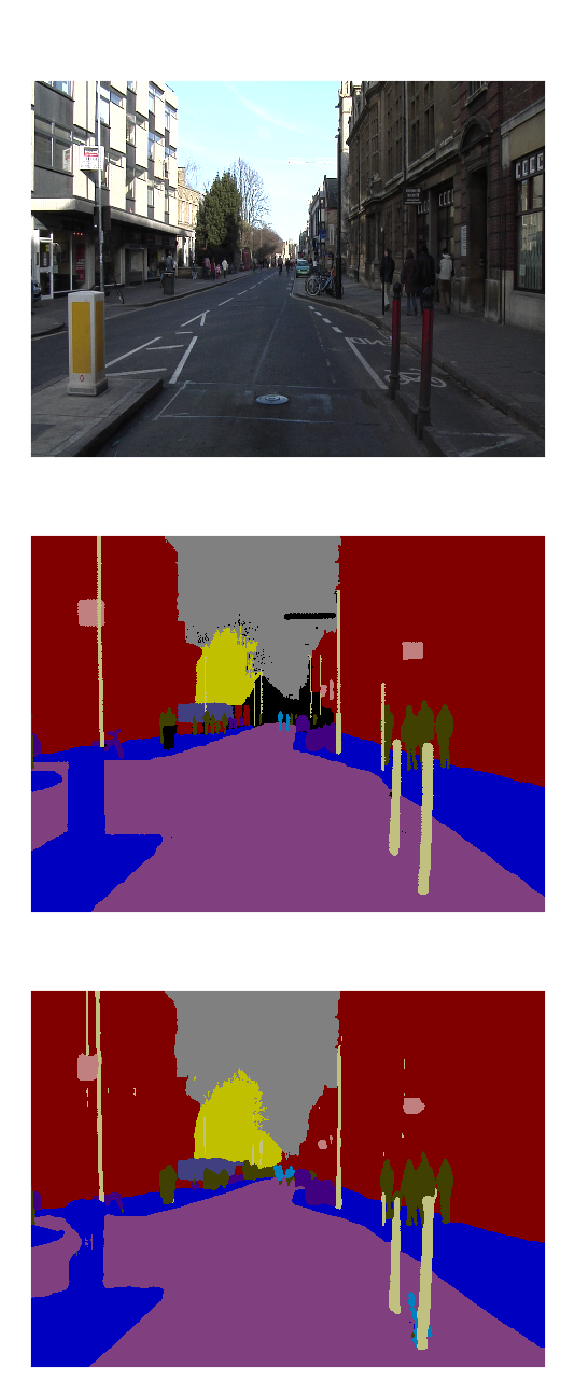

In [33]:
X, y, p = predict.predict(tune_model, generators['train'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

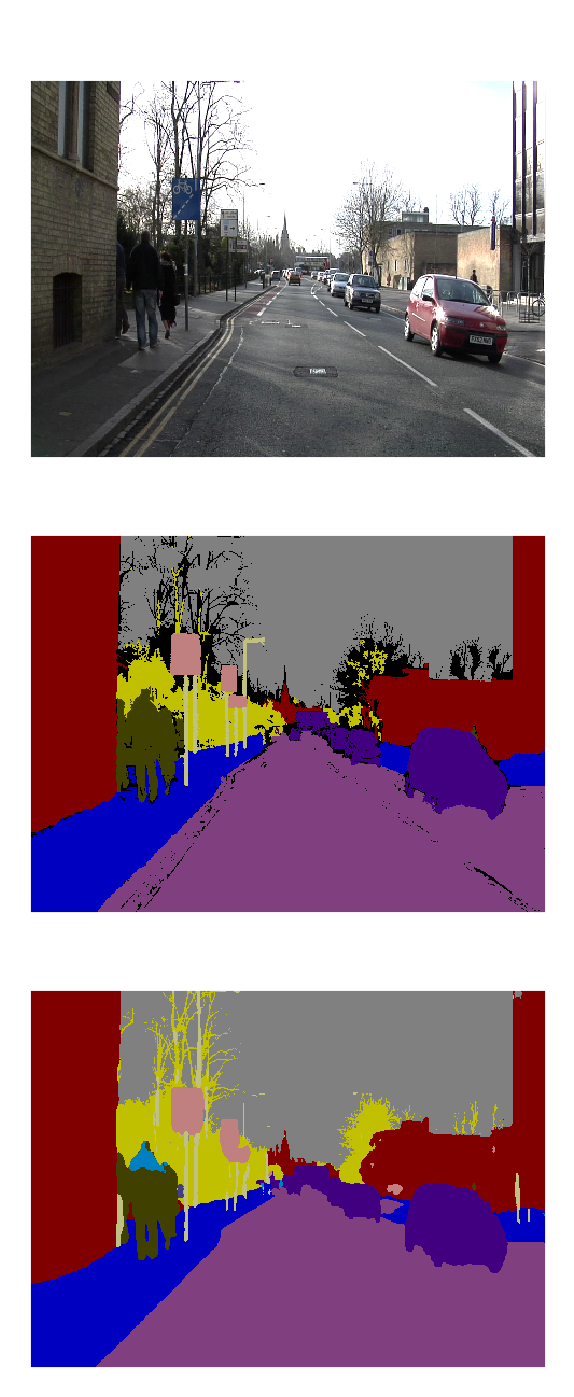

In [34]:
X, y, p = predict.predict(tune_model, generators['train'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

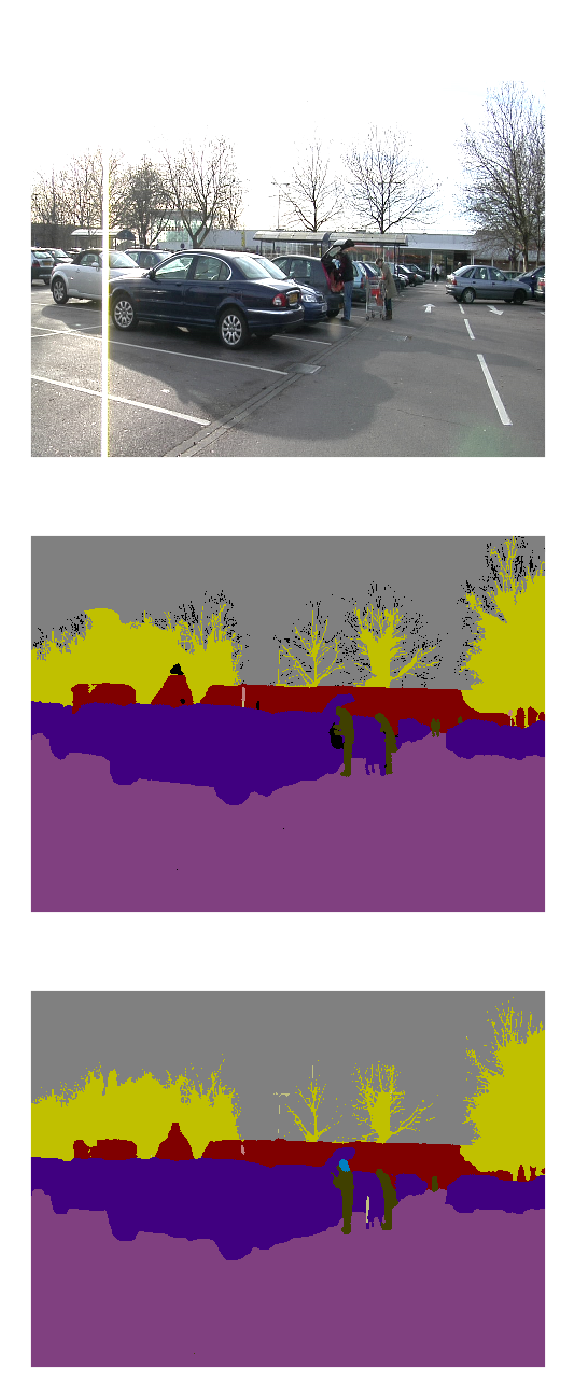

In [35]:
X, y, p = predict.predict(tune_model, generators['train'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

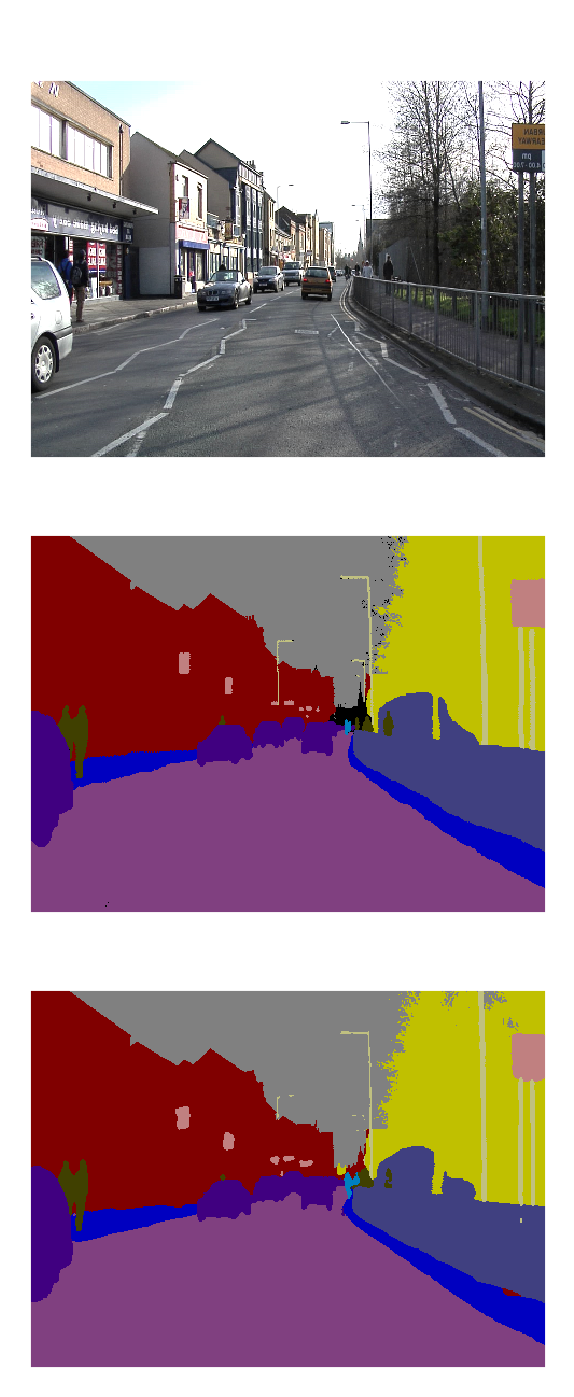

In [36]:
X, y, p = predict.predict(tune_model, generators['train'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

### Validation

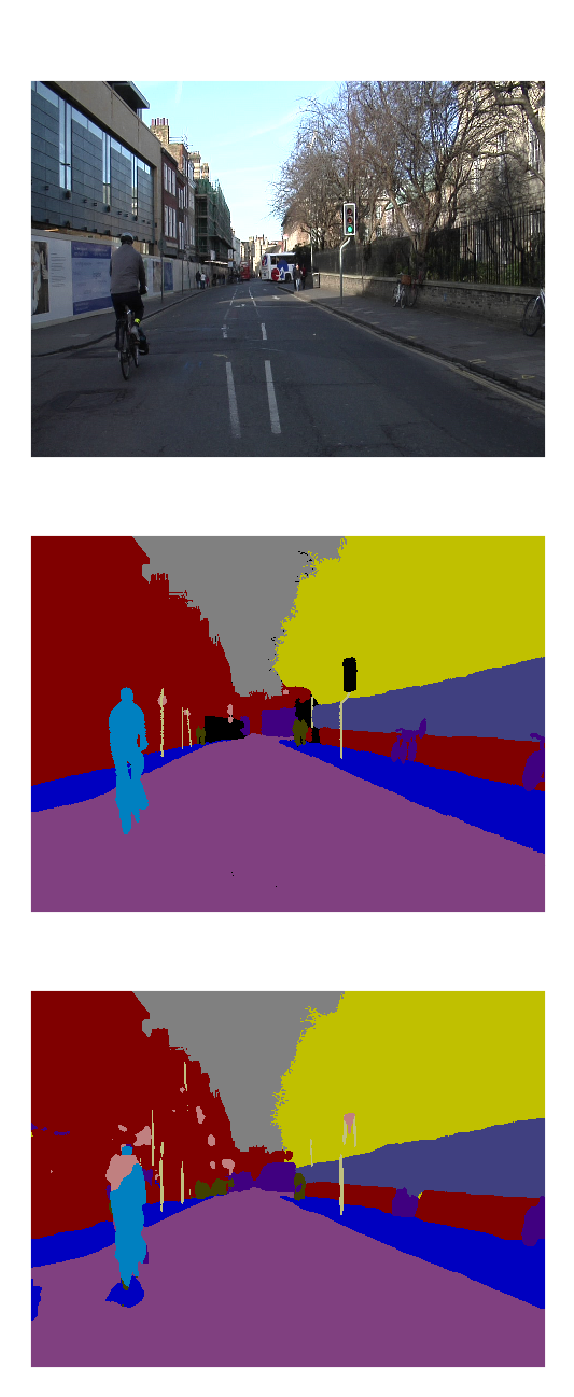

In [37]:
X, y, p = predict.predict(tune_model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

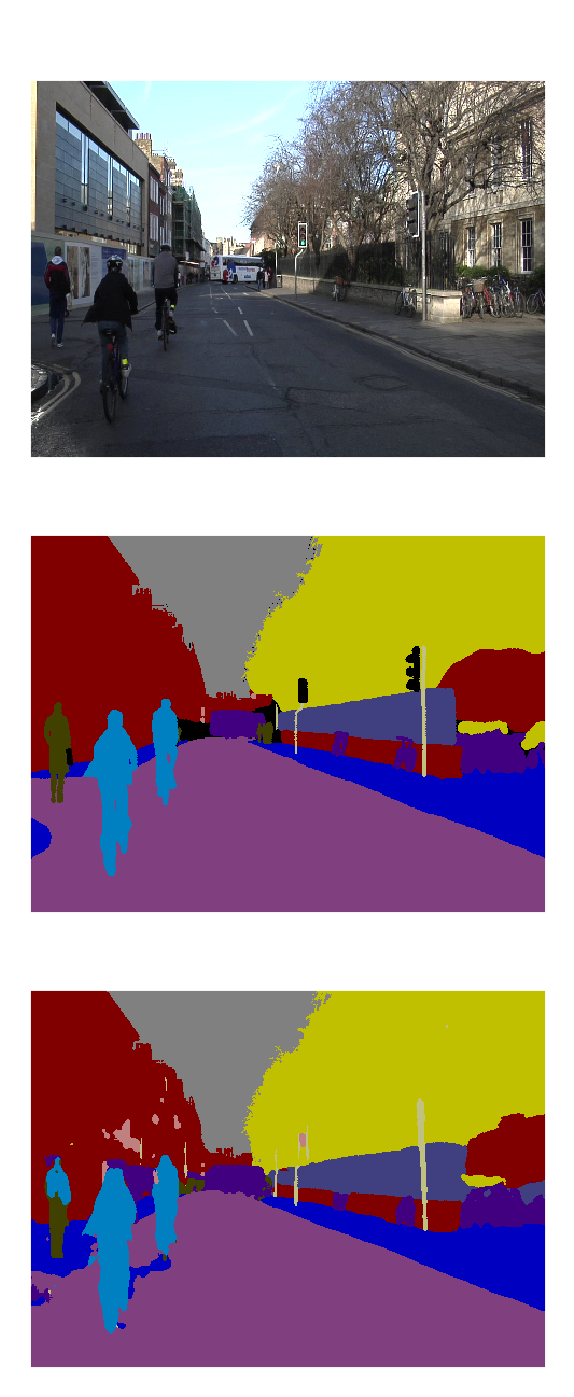

In [38]:
X, y, p = predict.predict(tune_model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

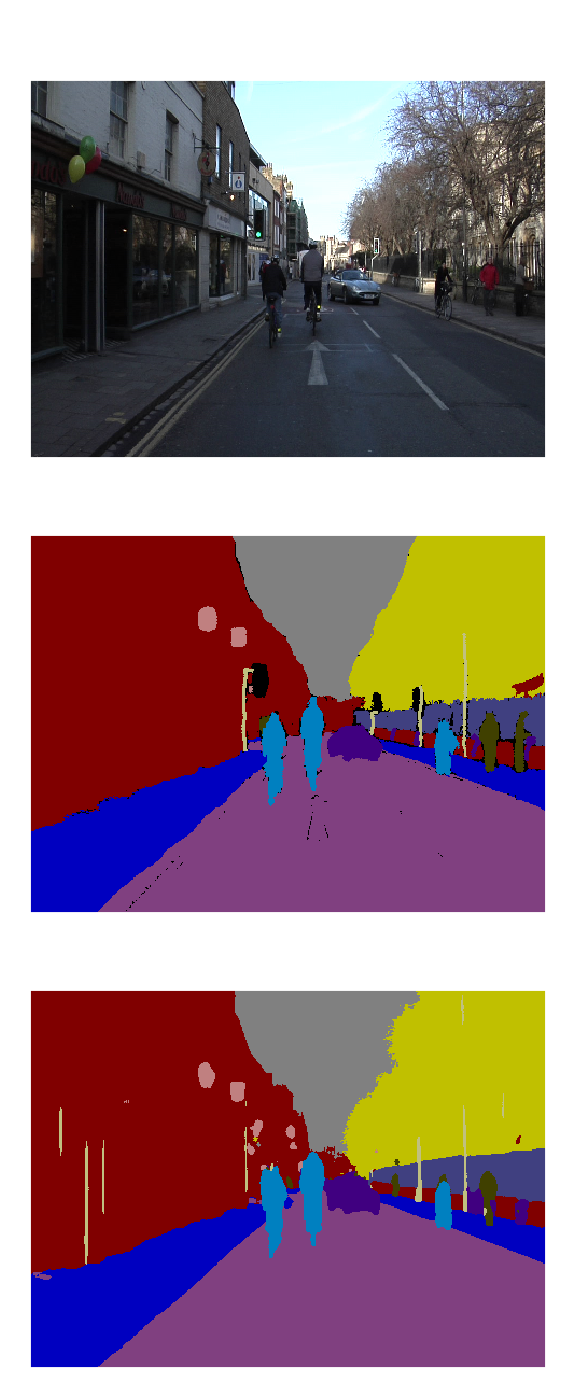

In [39]:
X, y, p = predict.predict(tune_model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

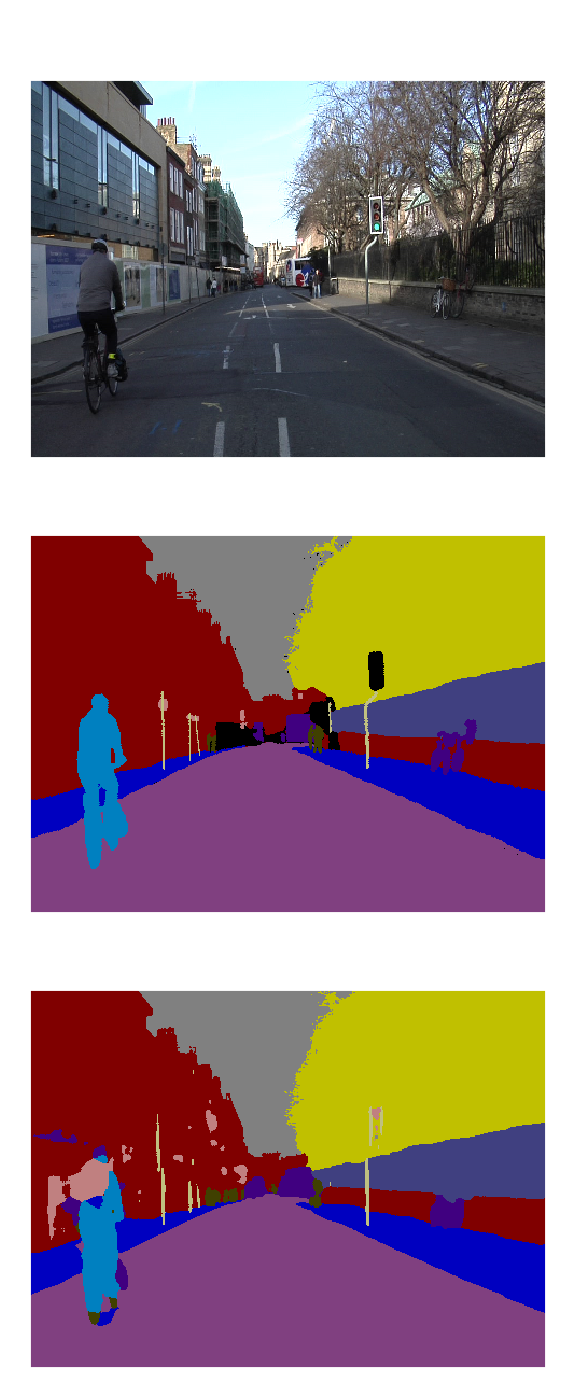

In [40]:
X, y, p = predict.predict(tune_model, generators['val'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

### Test

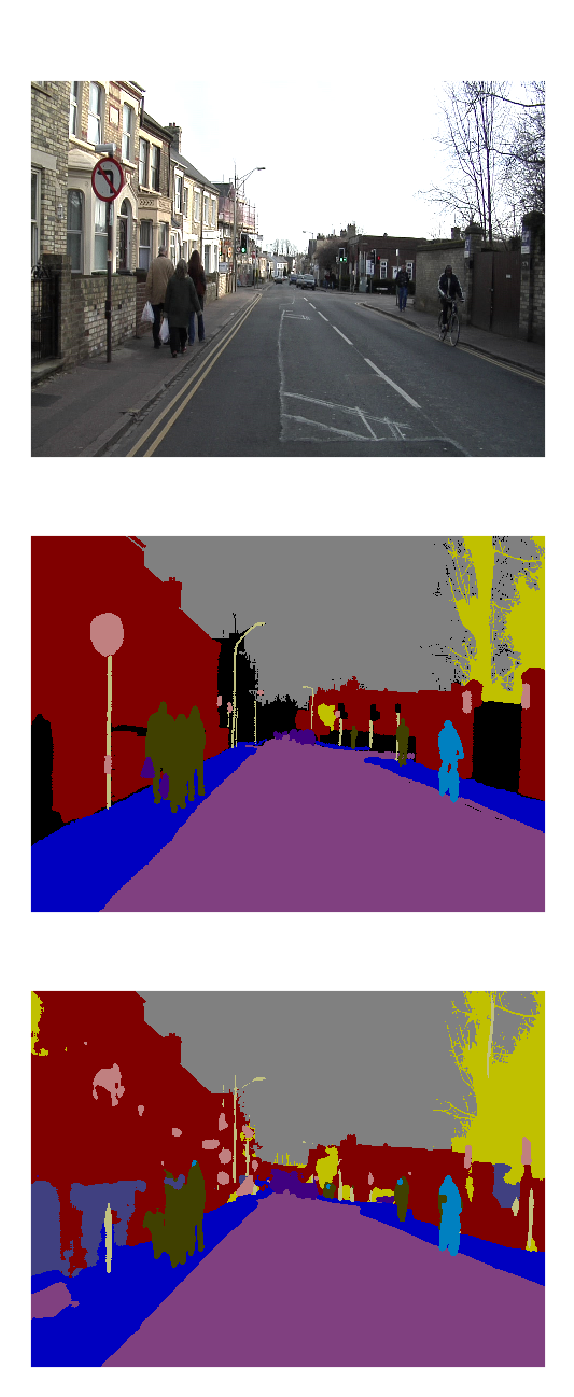

In [41]:
X, y, p = predict.predict(tune_model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

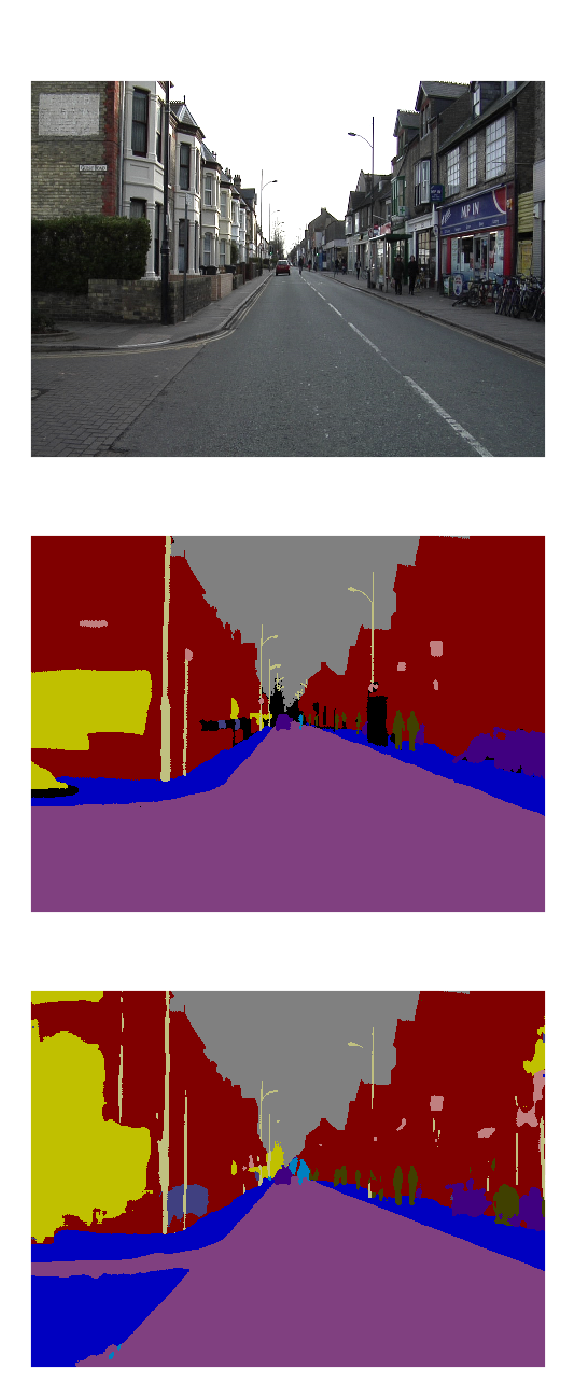

In [42]:
X, y, p = predict.predict(tune_model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

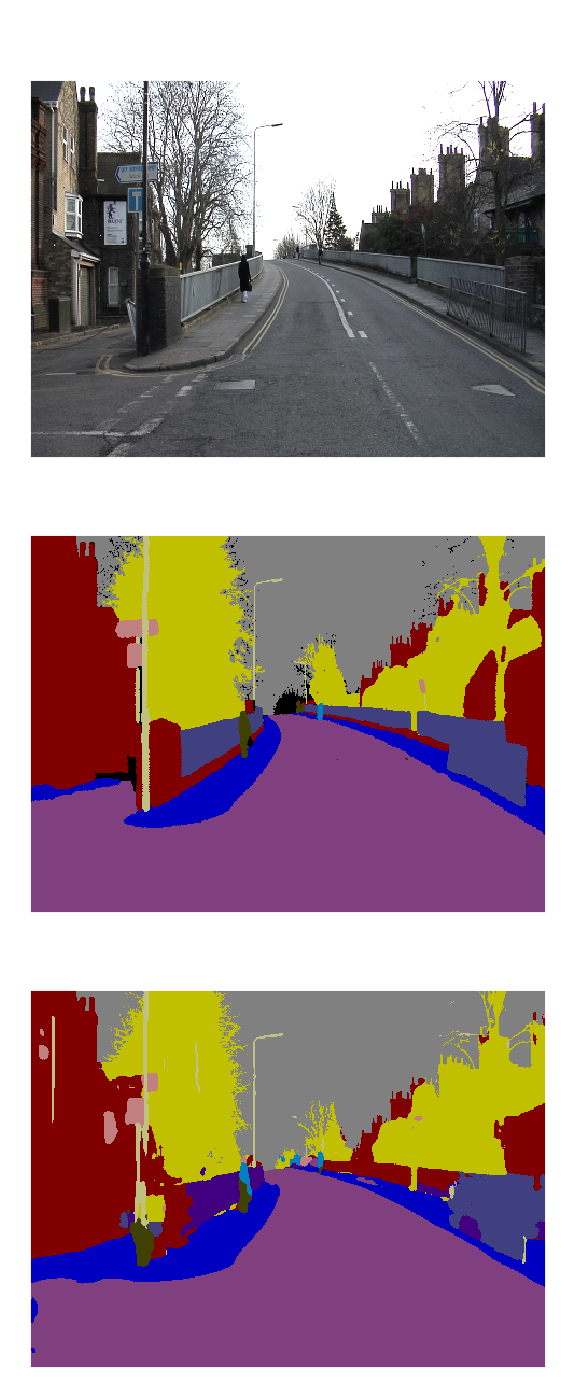

In [43]:
X, y, p = predict.predict(tune_model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])

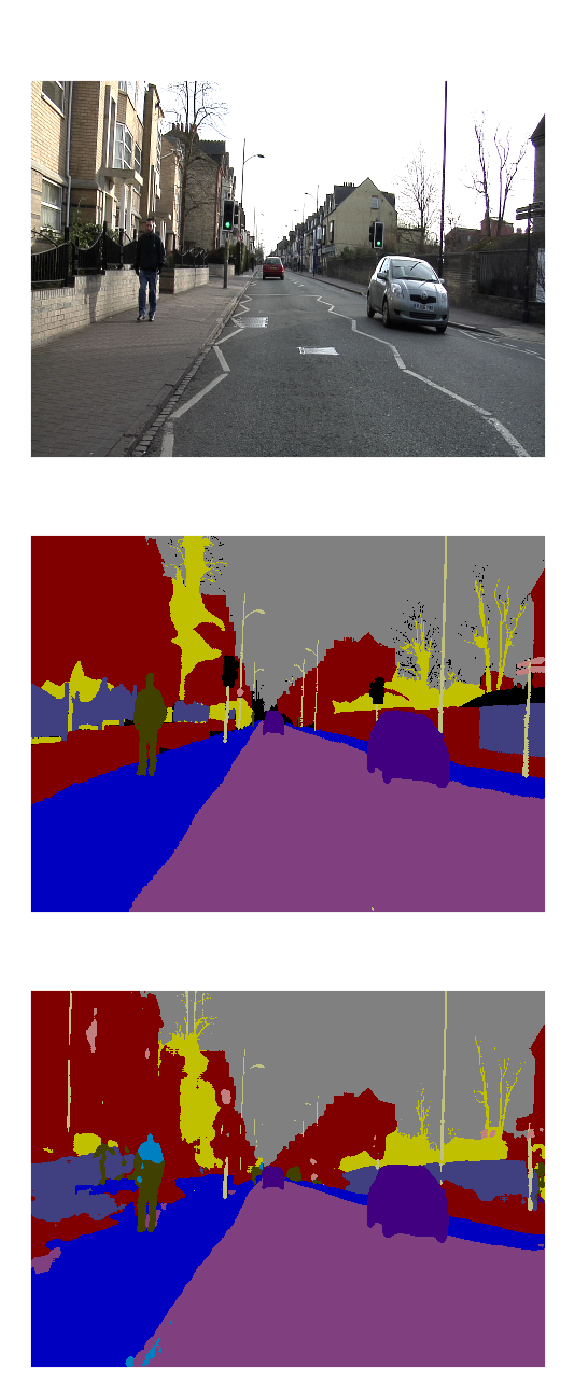

In [44]:
X, y, p = predict.predict(tune_model, generators['test'], camvid11)
camvid.plot(X=X[0], y=y[0], y_pred=p[0], order=['X', 'y', 'y_pred'])